In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup
import re
from googlesearch import search
from tqdm import tqdm

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df=pd.read_csv('Car_data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.shape

(11914, 16)

In [5]:
df[df.duplicated(keep=False)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
22,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
87,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
88,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(11199, 16)

In [8]:
dft_1=pd.DataFrame()
dft_1['Null']=df.isna().sum().sort_values(ascending=False)
dft_1[dft_1['Null']>0]

,Null
Market Category,3376
Engine HP,69
Engine Cylinders,30
Number of Doors,6
Engine Fuel Type,3


In [9]:
dft_2=df[df['Engine HP'].isna()]
dft_2.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915


In [10]:
dft_3=df[~(df['Engine HP'].isna())]
dft_3.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
for i in dft_2.index:
    mk=dft_2['Make'].loc[i]
    mdl=dft_2['Model'].loc[i]
    yr=dft_2['Year'].loc[i]

    d=dft_3[(dft_3['Make']==mk) & (dft_3['Model']==mdl) & (dft_3['Year']==yr)]['Engine HP'].values
    if len(d)==0:
        d=dft_3[(dft_3['Make']==mk) & (dft_3['Model']==mdl)]['Engine HP'].values
    
    try:
        md=st.mode(d[d!=None])
    except:
        continue
        
    df['Engine HP'].loc[i]=md

In [12]:
df[df['Engine HP'].isna()].shape

(38, 16)

In [13]:
dft_2=df[df['Engine HP'].isna()]
dft_2

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
4705,Honda,Fit EV,2013,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,132,2202,36625
4706,Honda,Fit EV,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,132,2202,36625
6385,Nissan,Leaf,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,101,126,2009,35020
6386,Nissan,Leaf,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,101,126,2009,32000
6387,Nissan,Leaf,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,101,126,2009,28980
6388,Nissan,Leaf,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,101,126,2009,32100
6389,Nissan,Leaf,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,101,126,2009,35120


In [14]:
def eng_hp(j):
    r = requests.get(j)
    soup = BeautifulSoup(r.content, 'html.parser')
    res=soup.find_all('td', class_='value', string=re.compile('.*hp.*'))
    
    return re.search(r'(\d+)\shp.*', res[0].text).group(1)

In [15]:
for g in dft_2.groupby(['Make', 'Model']):
    
    query = g[0][0]+' '+g[0][1]+" hp evcompare"

    for j in search(query, tld="com", num=10, stop=10, pause=2):

        if bool(re.search('https\:\/\/evcompare\.io\/cars\/{}\/[^\/]+\/$'.format(g[0][0].lower()), j)):
            hp=eng_hp(j)
            break
            
    for j in list(dft_2[(dft_2['Make']==g[0][0]) & (dft_2['Model']==g[0][1])].index):
        df['Engine HP'].loc[j]=hp

In [16]:
df[df['Engine HP'].isna()].shape

(0, 16)

In [17]:
del dft_2, dft_3

In [18]:
dft_2=df[df['Engine Cylinders'].isna()]
dft_2.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,28995


In [19]:
dft_3=df[~(df['Engine Cylinders'].isna())]
dft_3.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [20]:
dft_3[dft_3['Engine Fuel Type']=='electric']['Engine Cylinders'].unique()

array([0.])

In [21]:
df['Engine Cylinders'].loc[dft_2[dft_2['Engine Fuel Type']=='electric'].index]=0.0

In [22]:
dft_2=df[df['Engine Cylinders'].isna()]
dft_2

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8695,Mazda,RX-7,1993,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,7523
8696,Mazda,RX-7,1994,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,8147
8697,Mazda,RX-7,1995,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,8839
8698,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,31930
8699,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,26435
8700,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,27860
8701,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,31000
8702,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,26435
8703,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,31700
8704,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,28560


In [23]:
#https://www.cars-data.com/en/mazda-rx-7/cylinders
df['Engine Cylinders'].loc[dft_2[dft_2['Model']=='RX-7'].index]=2.0

#https://www.cardekho.com/mazda/mazda-rx-8-specifications.htm
df['Engine Cylinders'].loc[dft_2[dft_2['Model']=='RX-8'].index]=4.0

In [24]:
del dft_2, dft_3

In [25]:
dft_2=df[df['Number of Doors'].isna()]
dft_2

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,785,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,785,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,785,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,785,0.0,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,785,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107,101,1391,71000


In [26]:
#https://www.cars.com/research/ferrari-ff-2013/
df['Number of Doors'].loc[dft_2[dft_2['Model']=='FF'].index]=2.0

#https://www.carexpert.com.au/tesla/model-s/2016-70-20f0b307
df['Number of Doors'].loc[dft_2[dft_2['Model']=='Model S'].index]=4.0

In [27]:
del dft_2

In [28]:
dft_2=df[df['Engine Fuel Type'].isna()]
dft_2

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [29]:
#https://www.fueleconomy.gov/feg/noframes/19808.shtml
df['Engine Fuel Type'].fillna('regular unleaded', inplace=True)

In [30]:
del dft_2

In [31]:
df=pd.concat([df, df['Market Category'].str.split(',', expand=True)], axis=1)

In [32]:
df.rename(columns={0: 'Mkt_Cat_0', 1: 'Mkt_Cat_1', 2: 'Mkt_Cat_2', 3: 'Mkt_Cat_3', 4: 'Mkt_Cat_4'}, inplace=True)

In [33]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Mkt_Cat_0,Mkt_Cat_1,Mkt_Cat_2,Mkt_Cat_3,Mkt_Cat_4
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Factory Tuner,Luxury,High-Performance,None,None
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Luxury,Performance,None,None,None
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Luxury,High-Performance,None,None,None
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Luxury,Performance,None,None,None
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,Luxury,None,None,None,None


In [34]:
dft_2=df[df['Market Category'].isna()]

In [35]:
dft_3=df[df['Market Category'].notna()]

In [36]:
dft_2.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Mkt_Cat_0,Mkt_Cat_1,Mkt_Cat_2,Mkt_Cat_3,Mkt_Cat_4
87,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000,NaN,NaN,NaN,NaN,NaN
91,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000,NaN,NaN,NaN,NaN,NaN
93,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000,NaN,NaN,NaN,NaN,NaN
203,Chrysler,300,2015,regular unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,37570,NaN,NaN,NaN,NaN,NaN
204,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Sedan,31,19,1013,31695,NaN,NaN,NaN,NaN,NaN


In [37]:
dft_3=df[df['Market Category'].notna()]
dft_3.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Mkt_Cat_0,Mkt_Cat_1,Mkt_Cat_2,Mkt_Cat_3,Mkt_Cat_4
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Factory Tuner,Luxury,High-Performance,None,None
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Luxury,Performance,None,None,None
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Luxury,High-Performance,None,None,None
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Luxury,Performance,None,None,None
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,Luxury,None,None,None,None


In [38]:
for i in dft_2.index:
    mk=dft_2['Make'].loc[i]
    mdl=dft_2['Model'].loc[i]

    d=dft_3[(dft_3['Make']==mk) & (dft_3['Model']==mdl)][['Mkt_Cat_0', 'Mkt_Cat_1', 'Mkt_Cat_2', 'Mkt_Cat_3', 'Mkt_Cat_4']].to_numpy().flatten()
    try:
        md=st.mode(d[d!=None])
    except:
        continue
        
    df['Market Category'].loc[i]=md

In [39]:
df.drop(['Mkt_Cat_0', 'Mkt_Cat_1', 'Mkt_Cat_2', 'Mkt_Cat_3', 'Mkt_Cat_4'], axis=1, inplace=True)

In [40]:
df=pd.concat([df, df['Market Category'].str.split(',', expand=True)], axis=1)
df.rename(columns={0: 'Mkt_Cat_0', 1: 'Mkt_Cat_1', 2: 'Mkt_Cat_2', 3: 'Mkt_Cat_3', 4: 'Mkt_Cat_4'}, inplace=True)

In [41]:
dft_2=df[df['Market Category'].isna()]

In [42]:
dft_2.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Mkt_Cat_0,Mkt_Cat_1,Mkt_Cat_2,Mkt_Cat_3,Mkt_Cat_4
479,Toyota,4Runner,2014,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Midsize,4dr SUV,23,17,2031,41365,NaN,NaN,NaN,NaN,NaN
480,Toyota,4Runner,2014,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Midsize,4dr SUV,23,17,2031,35740,NaN,NaN,NaN,NaN,NaN
481,Toyota,4Runner,2014,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,4.0,NaN,Midsize,4dr SUV,22,17,2031,37615,NaN,NaN,NaN,NaN,NaN
482,Toyota,4Runner,2014,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,4.0,NaN,Midsize,4dr SUV,22,17,2031,34695,NaN,NaN,NaN,NaN,NaN
483,Toyota,4Runner,2014,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,4.0,NaN,Midsize,4dr SUV,22,17,2031,35725,NaN,NaN,NaN,NaN,NaN


In [43]:
dft_3=df[df['Market Category'].notna()]

In [44]:
dft_3.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Mkt_Cat_0,Mkt_Cat_1,Mkt_Cat_2,Mkt_Cat_3,Mkt_Cat_4
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Factory Tuner,Luxury,High-Performance,None,None
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Luxury,Performance,None,None,None
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Luxury,High-Performance,None,None,None
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Luxury,Performance,None,None,None
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,Luxury,None,None,None,None


In [45]:
dft_3['Market Category Sep']=dft_3['Market Category'].apply(lambda x: x.split(','))

In [46]:
dft_3=dft_3.explode('Market Category Sep')

In [47]:
dft_3.drop(['Market Category', 'Mkt_Cat_0', 'Mkt_Cat_1', 'Mkt_Cat_2', 'Mkt_Cat_3', 'Mkt_Cat_4'], axis=1, inplace=True)

In [48]:
l=['Engine HP', 'Engine Cylinders', 'Number of Doors']
dft_3[l]=dft_3[l].astype(int)

In [49]:
dft_3.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Market Category Sep
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,Compact,Coupe,26,19,3916,46135,Factory Tuner
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,Compact,Coupe,26,19,3916,46135,Luxury
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,Compact,Coupe,26,19,3916,46135,High-Performance
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,19,3916,40650,Luxury
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,19,3916,40650,Performance


In [50]:
y=dft_3['Market Category Sep'].values
X=dft_3.drop(['Market Category Sep'], axis=1)

X_pr=dft_2.drop(['Market Category', 'Mkt_Cat_0', 'Mkt_Cat_1', 'Mkt_Cat_2', 'Mkt_Cat_3', 'Mkt_Cat_4'], axis=1)

In [51]:
X_tr, X_te, y_tr, y_te=train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [52]:
def ohe(x_tr, x_te, x_pr):
    
    enc=OneHotEncoder(sparse_output=False, dtype=int, handle_unknown='ignore')
    enc.fit(x_tr)
    
    x_tr_enc=enc.transform(x_tr)
    x_te_enc=enc.transform(x_te)
    x_pr_enc=enc.transform(x_pr)
    
    return x_tr_enc, x_te_enc, x_pr_enc

In [53]:
def norm(x_tr, x_te, x_pr):
    
    mm_scaler=MinMaxScaler()
    mm_scaler.fit(x_tr.reshape(-1,1))
    
    x_tr_mm_sc=mm_scaler.transform(x_tr.reshape(-1,1))
    x_te_mm_sc=mm_scaler.transform(x_te.reshape(-1,1))
    x_pr_mm_sc=mm_scaler.transform(x_pr.reshape(-1,1))
    
    return x_tr_mm_sc, x_te_mm_sc, x_pr_mm_sc

In [54]:
for idx,i in enumerate(X_tr.columns):
    
    if (X_tr[i].dtype=='object') | (i=='Year'):
        x_tr, x_te, x_pr=ohe(X_tr[i].values.reshape(-1, 1), X_te[i].values.reshape(-1, 1), X_pr[i].values.reshape(-1, 1))
    else:
        x_tr, x_te, x_pr=norm(X_tr[i].values, X_te[i].values, X_pr[i].values)
    
    if idx==0:
        X_tr_enc=x_tr
        X_te_enc=x_te
        X_pr_enc=x_pr
    else:
        X_tr_enc=np.hstack((X_tr_enc, x_tr))
        X_te_enc=np.hstack((X_te_enc, x_te))
        X_pr_enc=np.hstack((X_pr_enc, x_pr))

In [55]:
le=LabelEncoder()
le.fit(y_tr)

y_tr_enc=le.transform(y_tr)
y_te_enc=le.transform(y_te)

In [56]:
param={'C':list(np.arange(0.0,1.0,0.1))}

lr=LogisticRegression(random_state=42, n_jobs=-1)

model = GridSearchCV(lr, param, scoring='accuracy', cv=5, return_train_score=True, verbose=4)
model.fit(X_tr_enc, y_tr_enc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .............C=0.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END .............C=0.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END .............C=0.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END .............C=0.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END .............C=0.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END .........C=0.1;, score=(train=0.640, test=0.618) total time=   7.6s
[CV 2/5] END .........C=0.1;, score=(train=0.643, test=0.598) total time=   4.9s
[CV 3/5] END .........C=0.1;, score=(train=0.643, test=0.612) total time=   5.3s
[CV 4/5] END .........C=0.1;, score=(train=0.641, test=0.597) total time=   5.0s
[CV 5/5] END .........C=0.1;, score=(train=0.638, test=0.608) total time=   4.7s
[CV 1/5] END .........C=0.2;, score=(train=0.658, test=0.624) total time=   5.1s
[CV 2/5] END .........C=0.2;, score=(train=0.660

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             param_grid={'C': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8,
                               0.9]},
             return_train_score=True, scoring='accuracy', verbose=4)

In [57]:
model.best_params_

{'C': 0.2}

In [58]:
lr=LogisticRegression(random_state=42, n_jobs=-1, C=model.best_params_['C'])
lr.fit(X_tr_enc, y_tr_enc)

LogisticRegression(C=0.2, n_jobs=-1, random_state=42)

In [59]:
pred_y_tr = lr.predict(X_tr_enc)
pred_y_te = lr.predict(X_te_enc)

In [60]:
print("Train Data Accuracy: ", accuracy_score(y_tr_enc, pred_y_tr))
print("Test Data Accuracy: ", accuracy_score(y_te_enc, pred_y_te))

Train Data Accuracy:  0.6535178098322049
Test Data Accuracy:  0.6105387106270238


In [61]:
pred_y_pr = lr.predict_proba(X_pr_enc)

In [62]:
for idx,i in enumerate(dft_2.index):
    mk=pred_y_pr[idx]
    mk_5=mk[np.argsort(mk)[::-1][:5]]
    l=[]
    for j in range(0,4):
        l.append(mk_5[j])
        if (mk_5[j]-mk_5[j+1])>0.1:
            break
            
    mark_cat=', '.join(list(le.inverse_transform(np.sort(np.nonzero(np.in1d(mk,l))[0])[::-1])))
    df['Market Category'].loc[i]=mark_cat

In [63]:
del dft_2, dft_3

In [64]:
df.drop(['Mkt_Cat_0', 'Mkt_Cat_1', 'Mkt_Cat_2', 'Mkt_Cat_3', 'Mkt_Cat_4'], axis=1, inplace=True)

In [65]:
dft_1=pd.DataFrame()
dft_1['Null']=df.isna().sum().sort_values(ascending=False)
dft_1

,Null
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,0


In [66]:
del dft_1

In [67]:
df=pd.concat([df, df['Market Category'].str.split(',', expand=True)], axis=1)
df.rename(columns={0: 'Mkt_Cat_0', 1: 'Mkt_Cat_1', 2: 'Mkt_Cat_2', 3: 'Mkt_Cat_3', 4: 'Mkt_Cat_4'}, inplace=True)

In [68]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Mkt_Cat_0,Mkt_Cat_1,Mkt_Cat_2,Mkt_Cat_3,Mkt_Cat_4
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Factory Tuner,Luxury,High-Performance,None,None
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Luxury,Performance,None,None,None
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Luxury,High-Performance,None,None,None
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Luxury,Performance,None,None,None
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,Luxury,None,None,None,None


In [69]:
l=['Engine HP', 'Engine Cylinders', 'Number of Doors']
df[l]=df[l].astype('int64')

In [70]:
for i in df:
    if (df[i].dtype=='object'):
        print(i, ' - ', df[i].unique())
        print('\n')

Make  -  ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']


Model  -  ['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scagl

In [71]:
df[df['Transmission Type']=='UNKNOWN']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Mkt_Cat_0,Mkt_Cat_1,Mkt_Cat_2,Mkt_Cat_3,Mkt_Cat_4
1289,Oldsmobile,Achieva,1997,regular unleaded,150,4,UNKNOWN,front wheel drive,2,Performance,Midsize,Coupe,29,19,26,2000,Performance,None,None,None,None
1290,Oldsmobile,Achieva,1997,regular unleaded,150,4,UNKNOWN,front wheel drive,4,Performance,Midsize,Sedan,29,19,26,2000,Performance,None,None,None,None
4691,Pontiac,Firebird,2000,regular unleaded,305,8,UNKNOWN,rear wheel drive,2,"Hatchback,Performance",Midsize,2dr Hatchback,23,15,210,6175,Hatchback,Performance,None,None,None
4692,Pontiac,Firebird,2000,regular unleaded,305,8,UNKNOWN,rear wheel drive,2,"Hatchback,Factory Tuner,Performance",Midsize,2dr Hatchback,23,15,210,8548,Hatchback,Factory Tuner,Performance,None,None
4693,Pontiac,Firebird,2000,regular unleaded,305,8,UNKNOWN,rear wheel drive,2,"Factory Tuner,Performance",Midsize,Convertible,23,15,210,9567,Factory Tuner,Performance,None,None,None
6158,GMC,Jimmy,1999,regular unleaded,190,6,UNKNOWN,rear wheel drive,2,Performance,Compact,2dr SUV,19,14,549,2182,Performance,None,None,None,None
6160,GMC,Jimmy,1999,regular unleaded,190,6,UNKNOWN,four wheel drive,2,"Performance, Luxury, Flex Fuel, Factory Tuner",Compact,2dr SUV,19,14,549,2317,Performance,Luxury,Flex Fuel,Factory Tuner,None
6165,GMC,Jimmy,2000,regular unleaded,190,6,UNKNOWN,rear wheel drive,2,Performance,Compact,2dr SUV,20,15,549,2407,Performance,None,None,None,None
6174,GMC,Jimmy,2000,regular unleaded,190,6,UNKNOWN,four wheel drive,2,"Performance, Luxury, Flex Fuel, Factory Tuner",Compact,2dr SUV,18,14,549,2578,Performance,Luxury,Flex Fuel,Factory Tuner,None
6366,Chrysler,Le Baron,1993,regular unleaded,100,4,UNKNOWN,front wheel drive,2,Performance,Compact,Coupe,26,21,1013,2000,Performance,None,None,None,None


In [72]:
#https://www.auto123.com/en/new-cars/technical-specs/oldsmobile/achieva/1997/2-dr/sc/
df['Transmission Type'].loc[df[(df['Make']=='Oldsmobile') & (df['Model']=='Achieva') & (df['Year']==1997) &(df['Transmission Type']=='UNKNOWN')].index]='AUTOMATIC'

#https://www.newcartestdrive.com/reviews/2000-pontiac-firebird/
df['Transmission Type'].loc[df[(df['Make']=='Pontiac') & (df['Model']=='Firebird') & (df['Year']==2000) &(df['Transmission Type']=='UNKNOWN')].index]='AUTOMATIC'

#https://www.autoblog.com/buy/1999-GMC-Jimmy-SL__4dr_4x4/equipment/
df['Transmission Type'].loc[df[(df['Make']=='GMC') & (df['Model']=='Jimmy') & (df['Year']==1999) &(df['Transmission Type']=='UNKNOWN')].index]='AUTOMATIC'

#https://www.autoblog.com/buy/2000-GMC-Jimmy/specs/
df['Transmission Type'].loc[df[(df['Make']=='GMC') & (df['Model']=='Jimmy') & (df['Year']==2000) &(df['Transmission Type']=='UNKNOWN')].index]='AUTOMATIC'

#https://www.edmunds.com/chrysler/le-baron/1993/st-13462/features-specs/
df['Transmission Type'].loc[df[(df['Make']=='Chrysler') & (df['Model']=='Le Baron') & (df['Year']==1993) &(df['Transmission Type']=='UNKNOWN')].index]='MANUAL'

#https://www.autodetective.com/directory/1991/dodge/ram-150/
df['Transmission Type'].loc[df[(df['Make']=='Dodge') & (df['Model']=='RAM 150') & (df['Year']==1991) &(df['Transmission Type']=='UNKNOWN')].index]='AUTOMATIC'

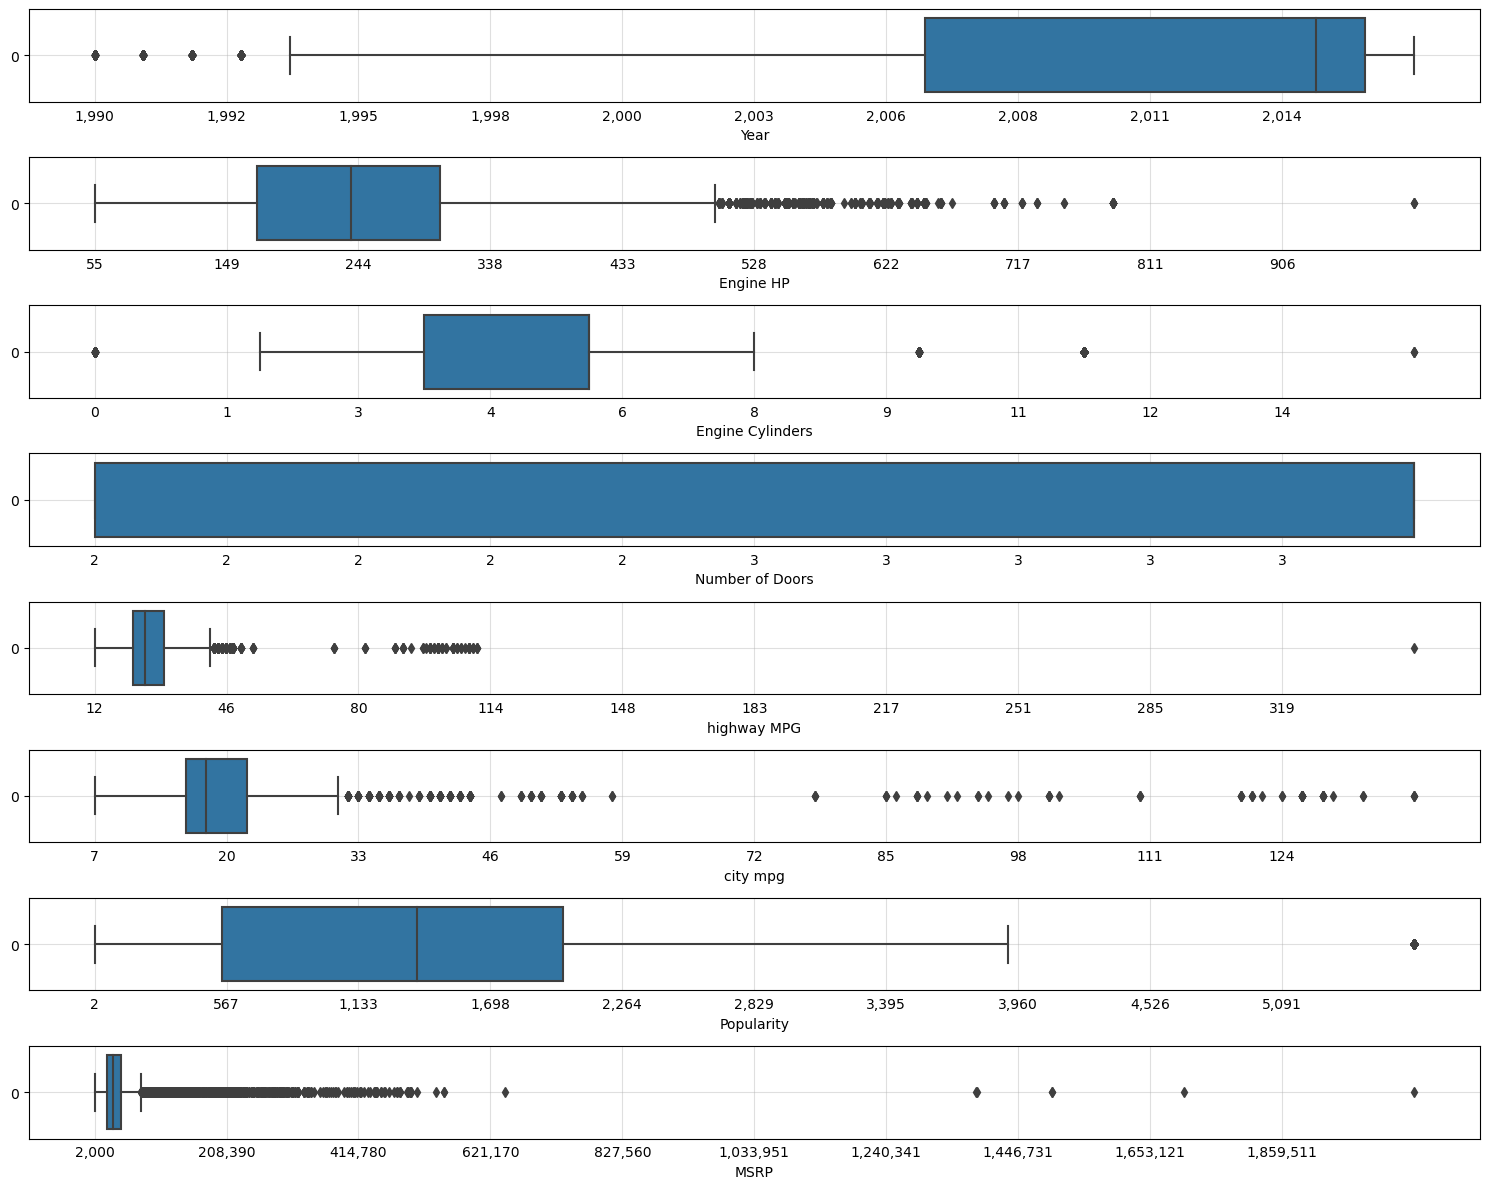

In [73]:
l=[]
for i in df:
    if (df[i].dtype=='int64'):
        l.append(i)

def func(x, pos):
    s = '{:0,d}'.format(int(x))
    return s

x_format = tkr.FuncFormatter(func)

fig, axs=plt.subplots(len(l),1, figsize=(15,12))
for idx,i in enumerate(l):
    sns.boxplot(df[i], orient='h', ax=axs[idx])
    axs[idx].set_xticks(list(np.arange(df[i].min(),df[i].max(), (df[i].max()-df[i].min())/10)))
    axs[idx].tick_params(axis='x', pad=5, length=0)
    axs[idx].set_xlabel(i)
    axs[idx].grid(axis='y', alpha=0.4)
    axs[idx].grid(axis='x', alpha=0.4)
    axs[idx].set_axisbelow(True)
    axs[idx].xaxis.set_major_formatter(x_format)
    
fig.tight_layout()
plt.show()

In [74]:
df[df['Engine HP']>520]['Market Category'].value_counts()

Market Category
Exotic,High-Performance                                   117
Factory Tuner,Luxury,High-Performance                      73
Factory Tuner,High-Performance                             41
Luxury,High-Performance                                    33
Exotic,Factory Tuner,Luxury,High-Performance               29
Exotic,Luxury,High-Performance                             21
Crossover,Factory Tuner,Luxury,High-Performance            16
Exotic,Luxury,Performance                                  13
Exotic,Flex Fuel,Factory Tuner,Luxury,High-Performance     13
Exotic,Factory Tuner,High-Performance                      11
Exotic,Flex Fuel,Luxury,High-Performance                   11
Exotic,Performance                                         10
Exotic,Luxury                                               6
High-Performance                                            6
Crossover,Luxury,High-Performance                           2
Factory Tuner,Luxury                                  

In [75]:
df[df['Engine Cylinders']<1]['Engine Fuel Type'].unique()

array(['electric'], dtype=object)

In [76]:
df[df['Engine Cylinders']>8]['Market Category'].value_counts()

Market Category
Exotic,High-Performance                                   141
Exotic,Luxury,Performance                                  25
Luxury,High-Performance                                    25
Exotic,Luxury,High-Performance                             19
Exotic,Factory Tuner,High-Performance                      19
Factory Tuner,Luxury,High-Performance                      13
Exotic,Flex Fuel,Factory Tuner,Luxury,High-Performance     13
Exotic,Flex Fuel,Luxury,High-Performance                   11
Exotic,Luxury                                              10
Luxury,Performance                                         10
Exotic,Factory Tuner,Luxury,High-Performance                5
Luxury                                                      3
Factory Tuner,Luxury,Performance                            1
Crossover,Luxury,Diesel                                     1
Name: count, dtype: int64

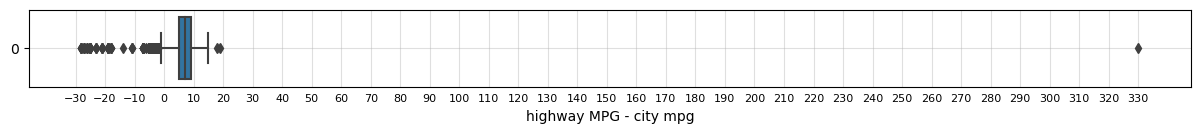

In [77]:
figure,axs = plt.subplots(1,1, figsize=(15,1))
sns.boxplot(df['highway MPG']-df['city mpg'], orient='h', ax=axs)
axs.set_xticks(np.arange(-30, 331, 10))
axs.tick_params(axis='x', pad=5, length=0, labelsize=8)
axs.set_xlabel('highway MPG - city mpg')
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [78]:
d=df['highway MPG']-df['city mpg']
df[d<0]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Mkt_Cat_0,Mkt_Cat_1,Mkt_Cat_2,Mkt_Cat_3,Mkt_Cat_4
539,FIAT,500e,2015,electric,111,0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,108,122,819,31800,Hatchback,None,None,None,None
540,FIAT,500e,2016,electric,111,0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,103,121,819,31800,Hatchback,None,None,None,None
541,FIAT,500e,2017,electric,111,0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,103,121,819,31800,Hatchback,None,None,None,None
1202,Honda,Accord Hybrid,2014,regular unleaded,195,4,AUTOMATIC,front wheel drive,4,Hybrid,Midsize,Sedan,45,50,2202,31905,Hybrid,None,None,None,None
1203,Honda,Accord Hybrid,2014,regular unleaded,195,4,AUTOMATIC,front wheel drive,4,Hybrid,Midsize,Sedan,45,50,2202,29155,Hybrid,None,None,None,None
1204,Honda,Accord Hybrid,2014,regular unleaded,195,4,AUTOMATIC,front wheel drive,4,Hybrid,Midsize,Sedan,45,50,2202,34905,Hybrid,None,None,None,None
1205,Honda,Accord Hybrid,2015,regular unleaded,196,4,AUTOMATIC,front wheel drive,4,Hybrid,Midsize,Sedan,45,50,2202,35055,Hybrid,None,None,None,None
1206,Honda,Accord Hybrid,2015,regular unleaded,196,4,AUTOMATIC,front wheel drive,4,Hybrid,Midsize,Sedan,45,50,2202,32055,Hybrid,None,None,None,None
1207,Honda,Accord Hybrid,2015,regular unleaded,196,4,AUTOMATIC,front wheel drive,4,Hybrid,Midsize,Sedan,45,50,2202,29305,Hybrid,None,None,None,None
1208,Honda,Accord Hybrid,2017,regular unleaded,212,4,AUTOMATIC,front wheel drive,4,Hybrid,Midsize,Sedan,47,49,2202,29605,Hybrid,None,None,None,None


In [79]:
df['highway MPG'].loc[df[d<0].index]=df['city mpg'].loc[df[d<0].index]

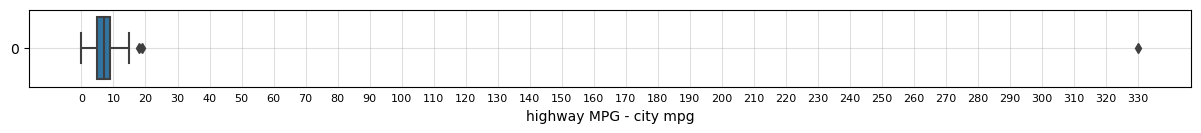

In [80]:
figure, axs = plt.subplots(1,1, figsize=(15,1))
sns.boxplot(df['highway MPG']-df['city mpg'], orient='h', ax=axs)
axs.set_xticks(np.arange(0, 331, 10))
axs.tick_params(axis='x', pad=5, length=0, labelsize=8)
axs.set_xlabel('highway MPG - city mpg')
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [81]:
d=df['highway MPG']-df['city mpg']
df[d>15]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Mkt_Cat_0,Mkt_Cat_1,Mkt_Cat_2,Mkt_Cat_3,Mkt_Cat_4
1119,Audi,A6,2017,premium unleaded (recommended),252,4,AUTOMATED_MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,354,24,3105,51600,Luxury,None,None,None,None
3157,Chevrolet,Cruze,2015,diesel,148,4,AUTOMATIC,front wheel drive,4,Diesel,Midsize,Sedan,46,27,1385,25660,Diesel,None,None,None,None
4257,Lotus,Evora 400,2017,premium unleaded (required),400,6,MANUAL,rear wheel drive,2,"Exotic,High-Performance",Compact,Coupe,39,21,613,91900,Exotic,High-Performance,None,None,None


In [82]:
#https://www.cars.com/research/audi-a6-2017/
df['highway MPG'].loc[1119]=35

#https://media.chevrolet.com/media/us/en/chevrolet/vehicles/cruze/2015.html
df['highway MPG'].loc[3157]=40

#https://www.fueleconomy.gov/feg/bymodel/2017_Lotus_Evora.shtml
df['highway MPG'].loc[4257]=24
df['city mpg'].loc[4257]=16

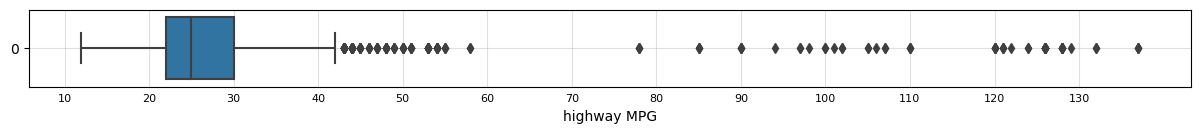

In [83]:
figure,axs = plt.subplots(1,1, figsize=(15,1))
sns.boxplot(df['highway MPG'], orient='h', ax=axs)
axs.set_xticks(np.arange(10, 140, 10))
axs.tick_params(axis='x', pad=5, length=0, labelsize=8)
axs.set_xlabel('highway MPG')
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

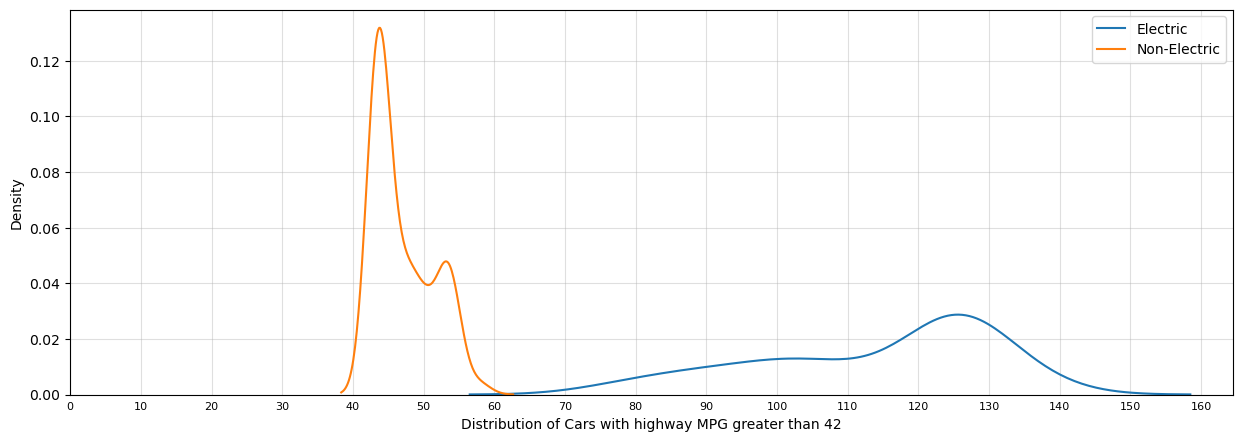

In [84]:
fig, axs = plt.subplots(1,1, figsize=(15,5))
sns.kdeplot(df[(df['highway MPG']>42) & (df['Engine Fuel Type']=='electric')]['highway MPG'], ax=axs)
sns.kdeplot(df[(df['highway MPG']>42) & ~(df['Engine Fuel Type']=='electric')]['highway MPG'], ax=axs)
axs.legend(['Electric', 'Non-Electric'])
axs.set_xticks(np.arange(0, 170, 10))
axs.tick_params(axis='x', pad=5, length=0, labelsize=8)
axs.set_xlabel('Distribution of Cars with highway MPG greater than 42')
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

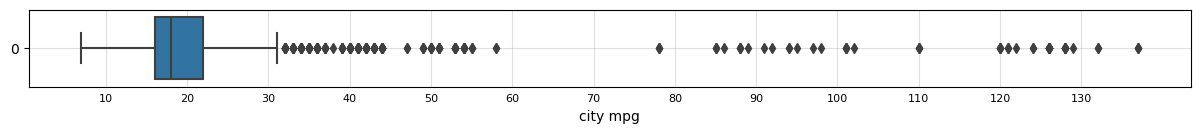

In [85]:
figure,axs = plt.subplots(1,1, figsize=(15,1))
sns.boxplot(df['city mpg'], orient='h', ax=axs)
axs.set_xticks(np.arange(10, 140, 10))
axs.tick_params(axis='x', pad=5, length=0, labelsize=8)
axs.set_xlabel('city mpg')
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

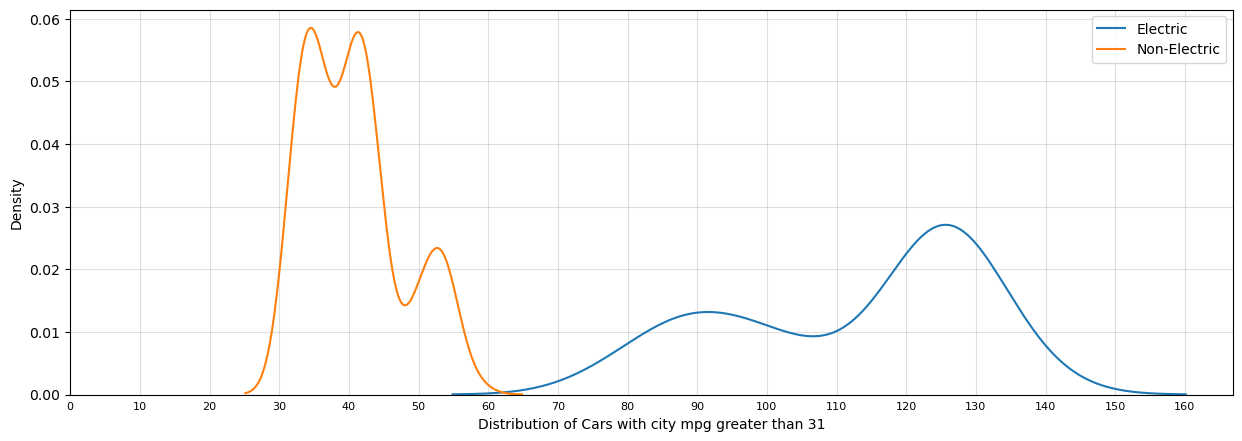

In [86]:
fig, axs = plt.subplots(1,1, figsize=(15,5))
sns.kdeplot(df[(df['city mpg']>31) & (df['Engine Fuel Type']=='electric')]['city mpg'], ax=axs)
sns.kdeplot(df[(df['city mpg']>31) & ~(df['Engine Fuel Type']=='electric')]['city mpg'], ax=axs)
axs.legend(['Electric', 'Non-Electric'])
axs.set_xticks(np.arange(0, 170, 10))
axs.tick_params(axis='x', pad=5, length=0, labelsize=8)
axs.set_xlabel('Distribution of Cars with city mpg greater than 31')
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [87]:
d=df[df['Popularity']>3960]
e=df[df['Popularity']<=3960]

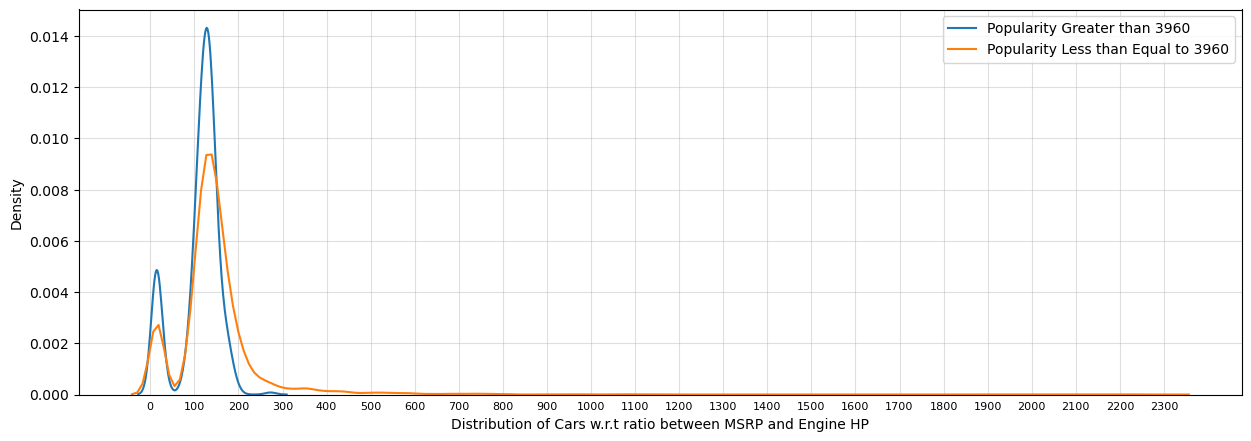

In [88]:
fig, axs = plt.subplots(1,1, figsize=(15,5))
sns.kdeplot(d['MSRP'].div(d['Engine HP']))
sns.kdeplot(e['MSRP'].div(e['Engine HP']))
axs.legend(['Popularity Greater than 3960', 'Popularity Less than Equal to 3960'])
axs.set_xticks(np.arange(0, 2400, 100))
axs.tick_params(axis='x', pad=5, length=0, labelsize=8)
axs.set_xlabel('Distribution of Cars w.r.t ratio between MSRP and Engine HP')
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

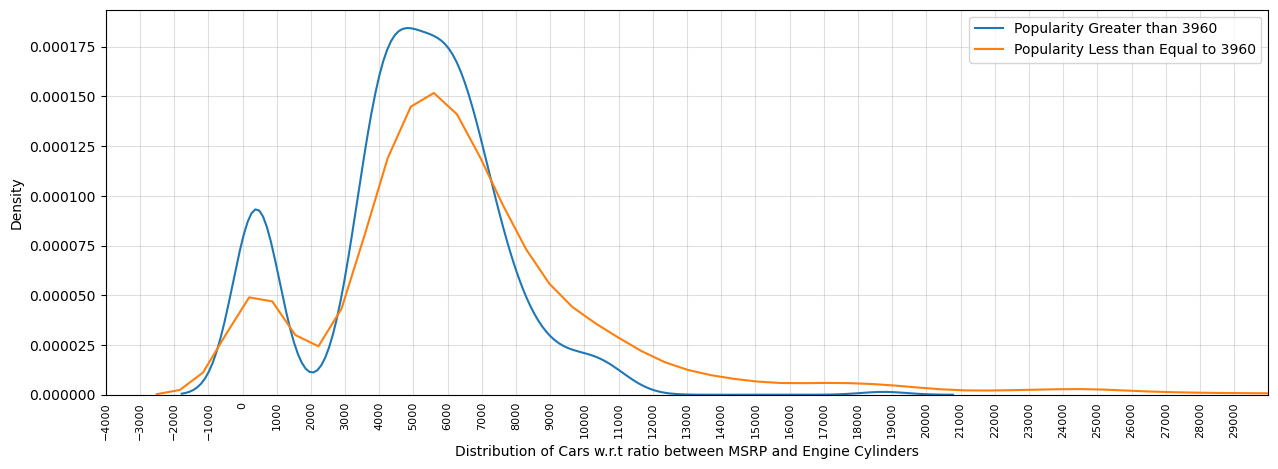

In [89]:
fig, axs = plt.subplots(1,1, figsize=(15,5))
sns.kdeplot(d['MSRP'].div(d['Engine Cylinders']))
sns.kdeplot(e['MSRP'].div(e['Engine Cylinders']))
axs.legend(['Popularity Greater than 3960', 'Popularity Less than Equal to 3960'])
axs.set_xlim(-4000,30000)
axs.set_xticks(np.arange(-4000, 30000, 1000))
axs.tick_params(axis='x', pad=5, length=0, labelsize=8, rotation=90)
axs.set_xlabel('Distribution of Cars w.r.t ratio between MSRP and Engine Cylinders')
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [90]:
d=df[df['Popularity']>3960]

In [91]:
d['Make'].unique()

array(['Ford'], dtype=object)

In [92]:
df[df['MSRP']>100000]['Market Category'].value_counts()

Market Category
Exotic,High-Performance                                   213
Luxury,High-Performance                                   105
Factory Tuner,Luxury,High-Performance                      69
Exotic,Luxury,High-Performance                             52
Exotic,Factory Tuner,Luxury,High-Performance               48
Exotic,Luxury,Performance                                  36
Exotic,Factory Tuner,High-Performance                      21
Exotic,Flex Fuel,Factory Tuner,Luxury,High-Performance     13
Flex Fuel,Luxury,High-Performance                          13
Exotic,Luxury                                              12
Crossover,Factory Tuner,Luxury,High-Performance            12
Exotic,Flex Fuel,Luxury,High-Performance                   11
High-Performance                                            6
Crossover,Luxury,Performance                                3
Exotic,Factory Tuner,Luxury,Performance                     3
Luxury,High-Performance,Hybrid                        

In [93]:
del d,e

In [94]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Mkt_Cat_0,Mkt_Cat_1,Mkt_Cat_2,Mkt_Cat_3,Mkt_Cat_4
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Factory Tuner,Luxury,High-Performance,None,None
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Luxury,Performance,None,None,None
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Luxury,High-Performance,None,None,None
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Luxury,Performance,None,None,None
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500,Luxury,None,None,None,None


In [95]:
df.shape

(11199, 21)

In [94]:
df.to_csv('Cars_Data.csv', index=False)

In [2]:
df=pd.read_csv('Cars_Data.csv')

In [3]:
df.shape

(11199, 21)

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Mkt_Cat_0,Mkt_Cat_1,Mkt_Cat_2,Mkt_Cat_3,Mkt_Cat_4
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Factory Tuner,Luxury,High-Performance,NaN,NaN
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Luxury,Performance,NaN,NaN,NaN
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Luxury,High-Performance,NaN,NaN,NaN
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Luxury,Performance,NaN,NaN,NaN
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500,Luxury,NaN,NaN,NaN,NaN


In [5]:
df.drop(df.columns[-5:], axis=1, inplace=True)

In [6]:
d=df.drop(['Market Category'], axis=1)

In [8]:
d=pd.get_dummies(d, dtype='int')

In [9]:
d.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Bugatti,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,Make_Ferrari,Make_Ford,Make_GMC,Make_Genesis,Make_HUMMER,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Kia,Make_Lamborghini,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lotus,Make_Maserati,Make_Maybach,Make_Mazda,Make_McLaren,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Rolls-Royce,Make_Saab,Make_Scion,Make_Spyker,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Model_09-Mar,Model_09-May,Model_1 Series,Model_1 Series M,Model_100,Model_124 Spider,Model_190-Class,Model_2,Model_2 Series,Model_200,Model_200SX,Model_240,Model_240SX,Model_3,Model_3 Series,Model_3 Series Gran Turismo,Model_300,Model_300-Class,Model_3000GT,Model_300M,Model_300ZX,Model_323,Model_350-Class,Model_350Z,Model_360,Model_370Z,Model_4 Series,Model_4 Series Gran Coupe,Model_400-Class,Model_420-Class,Model_456M,Model_458 Italia,Model_4C,Model_4Runner,Model_5,Model_5 Series,Model_5 Series Gran Turismo,Model_500,Model_500-Class,Model_500L,Model_500X,Model_500e,Model_550,Model_560-Class,Model_57,Model_570S,Model_575M,Model_599,Model_6,Model_6 Series,Model_6 Series Gran Coupe,Model_600-Class,Model_6000,Model_612 Scaglietti,Model_62,Model_626,Model_650S Coupe,Model_650S Spider,Model_7 Series,Model_718 Cayman,Model_740,Model_760,Model_780,Model_8 Series,Model_80,Model_850,Model_86,Model_9-2X,Model_9-3 Griffin,Model_9-4X,Model_9-7X,Model_90,Model_900,Model_9000,Model_911,Model_928,Model_929,Model_940,Model_944,Model_960,Model_968,Model_A3,Model_A4,Model_A4 allroad,Model_A5,Model_A6,Model_A7,Model_A8,Model_ALPINA B6 Gran Coupe,Model_ALPINA B7,Model_AMG GT,Model_ATS,Model_ATS Coupe,Model_ATS-V,Model_Acadia,Model_Acadia Limited,Model_Accent,Model_Acclaim,Model_Accord,Model_Accord Crosstour,Model_Accord Hybrid,Model_Accord Plug-In Hybrid,Model_Achieva,Model_ActiveHybrid 5,Model_ActiveHybrid 7,Model_ActiveHybrid X6,Model_Aerio,Model_Aerostar,Model_Alero,Model_Allante,Model_Alpina,Model_Altima,Model_Altima Hybrid,Model_Amanti,Model_Armada,Model_Arnage,Model_Aspen,Model_Aspire,Model_Astro,Model_Astro Cargo,Model_Aurora,Model_Avalanche,Model_Avalon,Model_Avalon Hybrid,Model_Avenger,Model_Aventador,Model_Aveo,Model_Aviator,Model_Axxess,Model_Azera,Model_Aztek,Model_Azure,Model_Azure T,Model_B-Class Electric Drive,Model_B-Series,Model_B-Series Pickup,Model_B-Series Truck,Model_B9 Tribeca,Model_BRZ,Model_Baja,Model_Beetle,Model_Beetle Convertible,Model_Beretta,Model_Black Diamond Avalanche,Model_Blackwood,Model_Blazer,Model_Bolt EV,Model_Bonneville,Model_Borrego,Model_Boxster,Model_Bravada,Model_Breeze,Model_Bronco,Model_Bronco II,Model_Brooklands,Model_Brougham,Model_C-Class,Model_C-Max Hybrid,Model_C/K 1500 Series,Model_C/K 2500 Series,Model_C30,Model_C36 AMG,Model_C43 AMG,Model_C70,Model_C8,Model_CC,Model_CL,Model_CL-Class,Model_CLA-Class,Model_CLK-Class,Model_CLS-Class,Model_CR-V,Model_CR-Z,Model_CT 200h,Model_CT6,Model_CTS,Model_CTS Coupe,Model_CTS Wagon,Model_CTS-V,Model_CTS-V Coupe,Model_CTS-V Wagon,Model_CX-3,Model_CX-5,Model_CX-7,Model_CX-9,Model_Cabrio,Model_Cabriolet,Model_Cadenza,Model_Caliber,Model_California,Model_California T,Model_Camaro,Model_Camry,Model_Camry Hybrid,Model_Camry Solara,Model_Canyon,Model_Caprice,Model_Captiva Sport,Model_Caravan,Model_Carrera GT,Model_Cascada,Model_Catera,Model_Cavalier,Model_Cayenne,Model_Cayman,Model_Cayman S,Model_Celebrity,Model_Celica,Model_Century,Model_Challenger,Model_Charger,Model_Chevy Van,Model_Ciera,Model_Cirrus,Model_City Express,Model_Civic,Model_Civic CRX,Model_Civic del Sol,Model_Classic,Model_Cobalt,Model_Colorado,Model_Colt,Model_Concorde,Model_Continental,Model_Continental Flying Spur,Model_Continental Flying Spur Speed,Model_Continental GT,Model_Continental GT Speed,Model_Contine

In [10]:
d.to_excel('Cars_Data_Task3_get_dummies.xlsx')

In [21]:
del d

In [38]:
d=df[['Market Category', 'MSRP']]
d['Market Category Sep']=d['Market Category'].apply(lambda x: x.split(','))

In [39]:
d.head()

,Market Category,MSRP,Market Category Sep
0,"Factory Tuner,Luxury,High-Performance",46135,"[Factory Tuner, Luxury, High-Performance]"
1,"Luxury,Performance",40650,"[Luxury, Performance]"
2,"Luxury,High-Performance",36350,"[Luxury, High-Performance]"
3,"Luxury,Performance",29450,"[Luxury, Performance]"
4,Luxury,34500,[Luxury]


In [40]:
d[['Crossover', 'Diesel', 'Exotic', 'Factory Tuner', 'Flex Fuel', 'Hatchback', 'High-Performance', 'Hybrid', 'Luxury', 'Performance']]=0

In [41]:
d.head()

,Market Category,MSRP,Market Category Sep,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,"Factory Tuner,Luxury,High-Performance",46135,"[Factory Tuner, Luxury, High-Performance]",0,0,0,0,0,0,0,0,0,0
1,"Luxury,Performance",40650,"[Luxury, Performance]",0,0,0,0,0,0,0,0,0,0
2,"Luxury,High-Performance",36350,"[Luxury, High-Performance]",0,0,0,0,0,0,0,0,0,0
3,"Luxury,Performance",29450,"[Luxury, Performance]",0,0,0,0,0,0,0,0,0,0
4,Luxury,34500,[Luxury],0,0,0,0,0,0,0,0,0,0


In [45]:
for i in tqdm(d.index):
    for j in d['Market Category Sep'].loc[i]:
        d[j.strip()].loc[i]=1

100%|███████████████████████████████████████████████████████████████████████████| 11199/11199 [00:14<00:00, 772.42it/s]


In [46]:
d.head()

,Market Category,MSRP,Market Category Sep,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,"Factory Tuner,Luxury,High-Performance",46135,"[Factory Tuner, Luxury, High-Performance]",0,0,0,1,0,0,1,0,1,0
1,"Luxury,Performance",40650,"[Luxury, Performance]",0,0,0,0,0,0,0,0,1,1
2,"Luxury,High-Performance",36350,"[Luxury, High-Performance]",0,0,0,0,0,0,1,0,1,0
3,"Luxury,Performance",29450,"[Luxury, Performance]",0,0,0,0,0,0,0,0,1,1
4,Luxury,34500,[Luxury],0,0,0,0,0,0,0,0,1,0


In [47]:
d.drop(['Market Category', 'Market Category Sep'], axis=1, inplace=True)
d=d.iloc[:,[1,2,3,4,5,6,7,8,9,10,0]]

In [48]:
d.head()

,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance,MSRP
0,0,0,0,1,0,0,1,0,1,0,46135
1,0,0,0,0,0,0,0,0,1,1,40650
2,0,0,0,0,0,0,1,0,1,0,36350
3,0,0,0,0,0,0,0,0,1,1,29450
4,0,0,0,0,0,0,0,0,1,0,34500


In [49]:
d.to_excel('Cars_Data_Task3_get_dummies_mkt_cat.xlsx')